In [103]:
%pip install seaborn
%pip install plotly
%pip install nbformat
%pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install --upgrade nbformat


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Explore Data

In [19]:
df = pd.read_csv("data/lettuce_dataset.csv", encoding="latin-1")
df.head()

,Plant_ID,Date,Temperature (Celcius),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,8/3/2023,33.4,53,582,6.4,1
1,1,8/4/2023,33.5,53,451,6.1,2
2,1,8/5/2023,33.4,59,678,6.4,3
3,1,8/6/2023,33.4,68,420,6.4,4
4,1,8/7/2023,33.4,74,637,6.5,5


In [20]:
df.describe()

,Plant_ID,Temperature (Celcius),Humidity (%),TDS Value (ppm),pH Level,Growth Days
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,35.441780,28.142222,64.873462,598.045440,6.399211,23.140107
std,20.243433,4.670521,8.988985,115.713047,0.234418,13.075415
min,1.000000,18.000000,50.000000,400.000000,6.000000,1.000000
25%,18.000000,23.600000,57.000000,498.000000,6.200000,12.000000
50%,35.000000,30.200000,65.000000,593.000000,6.400000,23.000000
75%,53.000000,31.500000,73.000000,699.000000,6.600000,34.000000
max,70.000000,33.500000,80.000000,800.000000,6.800000,48.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Plant_ID               3169 non-null   int64  
 1   Date                   3169 non-null   object 
 2   Temperature (Celcius)  3169 non-null   float64
 3   Humidity (%)           3169 non-null   int64  
 4   TDS Value (ppm)        3169 non-null   int64  
 5   pH Level               3169 non-null   float64
 6   Growth Days            3169 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 173.4+ KB


In [22]:
df.duplicated().sum()

0

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Plant_ID,Date,Temperature (Celcius),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,2023-08-03,33.4,53,582,6.4,1
1,1,2023-08-04,33.5,53,451,6.1,2
2,1,2023-08-05,33.4,59,678,6.4,3
3,1,2023-08-06,33.4,68,420,6.4,4
4,1,2023-08-07,33.4,74,637,6.5,5


# Correlation

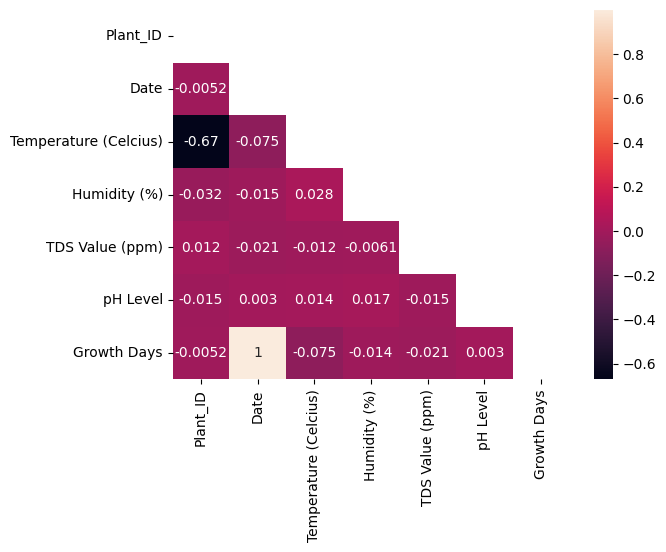

In [24]:
corr = df.corr()
matrix = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, annot=True, mask=matrix)

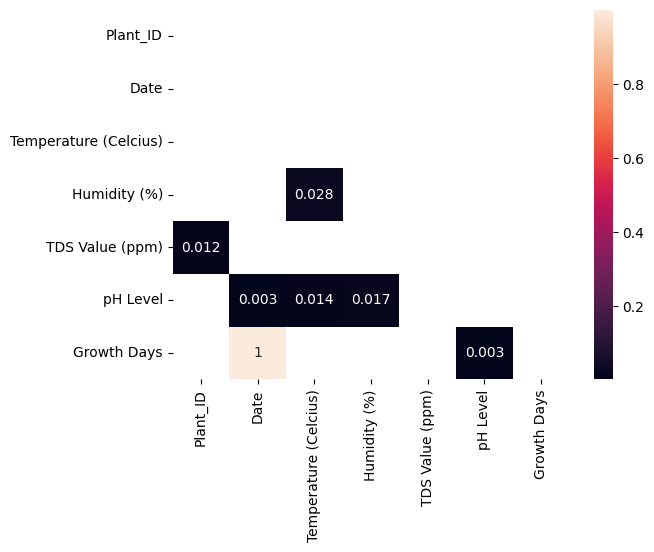

In [25]:
ax = sns.heatmap(corr, annot=True, mask=(corr<0)|matrix)

# Univariate Analysis

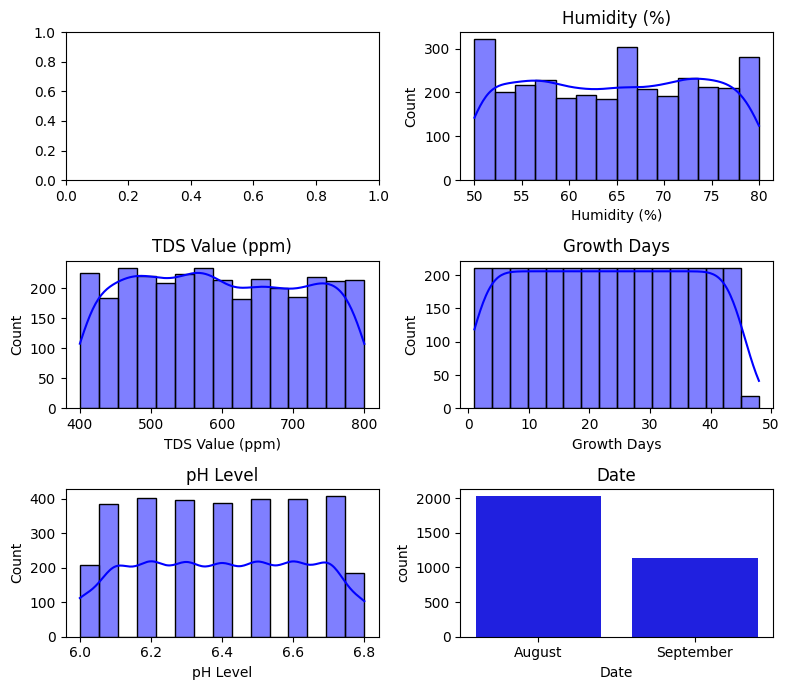

In [26]:
figure, axis = plt.subplots(3, 2, figsize=(8, 7))
plt.title("Distribution")
# sns.histplot(data=df, x=df['Temperature (°C)'], kde=True, color='blue', ax=axis[0,0]).set_title("Temperature (°C)")
sns.histplot(data=df, x=df['Humidity (%)'], kde=True, color='blue', ax=axis[0,1]).set_title("Humidity (%)")
sns.histplot(data=df, x=df['TDS Value (ppm)'], kde=True, color='blue', ax=axis[1,0]).set_title('TDS Value (ppm)')
sns.histplot(data=df, x=df['Growth Days'], kde=True, color='blue', ax=axis[1,1]).set_title("Growth Days")
sns.histplot(data=df, x=df['pH Level'], kde=True, color='blue', ax=axis[2,0]).set_title('pH Level')
sns.countplot(data=df, x=df['Date'].dt.month.map({8:"August", 9:"September"}), color='blue', ax=axis[2,1]).set_title("Date")
plt.tight_layout()


Here we can see:
* `Temperature` seems to be centering around 30-32 degree Celcius
* `Humidity` and `TDS` has a wider range
* `pH Level` mostly stays around 6.2 and 6.6

In [27]:
features = list(df.columns)

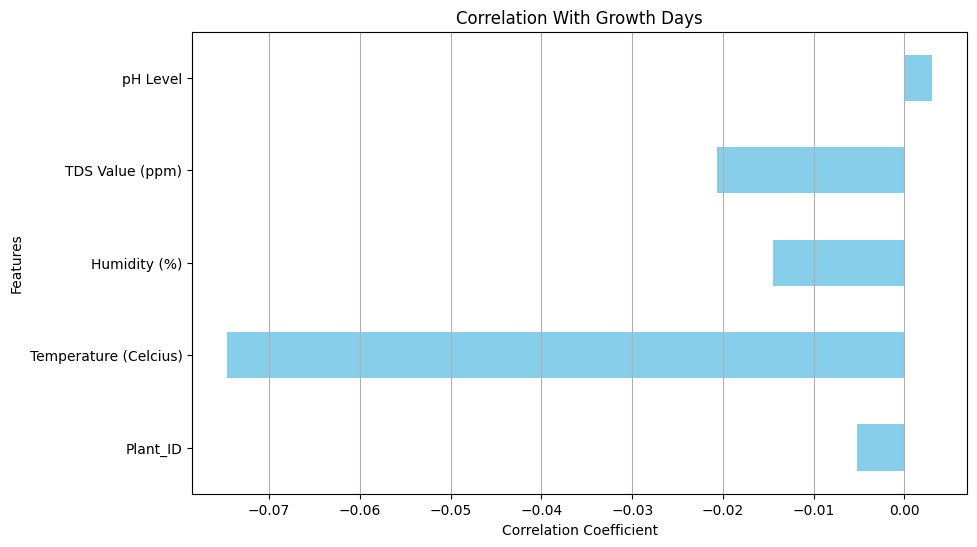

In [28]:
correlations = df[features].corr()['Growth Days'].drop(['Growth Days', 'Date'])

plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='skyblue')
plt.title('Correlation With Growth Days')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()



Here we can see `Date` is directly correlated with `Growth Days` so we can obmit it by dropping the column.

Among the other features, `Temperature` has the most significant negative correlation with `Growth Days`. However, the correlation point is relatively low so we need to inspect more.

# Bivariate Analysis

In [29]:
px.scatter(df, x="Temperature (Celcius)", y="Growth Days", title="Temperature Growth Days",  marginal_x="histogram", marginal_y="histogram")

Most lettuce grown in the temperature of 18 to 25 Degree Celcius. Meanwhile only a small subset of data points lie in the range 28-34. This means that lettuce rarely grows in high temperature.

In [30]:
px.box(df, x='pH Level', y='Growth Days', title='Growth Days vs pH Level')

We can see that pH Level does not affect lettuce growth days.

In [31]:
px.scatter(df, x="TDS Value (ppm)", y="Growth Days",
           title="TDS Growth Days", 
           marginal_x="histogram", marginal_y="histogram")

TDS also does not affect lettuce growth days.

In [32]:
px.box(df, x='Humidity (%)', y='Growth Days', title='Growth Days vs Humidity Percent')

Meanwhile `Humidity` exhibits a weak correlation with `Growth Days`

# Train with Simple Model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = df.drop(columns=['Plant_ID', 'Date', 'Growth Days'], axis=1)
y = df['Growth Days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize model
model = LinearRegression()


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate model's performance
def evaluate_performance(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print('Mean Absolute Error: ', mae)
    print('Mean Squared Error: ', mse)
    print('Root Mean Squared Error: ', rmse)
    print('R2 Score: ', r2)

    
evaluate_performance(y_test, y_pred)

Mean Absolute Error:  11.138275183138674
Mean Squared Error:  171.742455469307
Root Mean Squared Error:  13.105054577120502
R2 Score:  0.006069037745197292


In [41]:
model.intercept_
model.coef_

array([-0.19556001, -0.01775794, -0.00351   ,  0.03429214])

## Train model with Standardized features

In [47]:
def standardize(features:pd.DataFrame):
    return (features - features.mean()) / features.std()

In [54]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Add the 'Standardized Log TDS' feature to the main dataframe
log_TDS = np.log1p(df["TDS Value (ppm)"])
standardized_log_tds = standardize(log_TDS)
df['Standardized Log TDS'] = standardized_log_tds
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["DayOfYear"] = df["Date"].dt.dayofyear

# Split data into training and testing sets
X = df.drop(columns=['Plant_ID', 'Date', 'Growth Days'], axis=1)
y = df['Growth Days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize model
model = LinearRegression()


In [55]:
# Extract the transformed features from the main dataframe for train and test sets
X_train_transformed_features = df.loc[X_train.index, ['Standardized Log TDS', 'Month', 'DayOfYear']]
X_test_transformed_features = df.loc[X_test.index, ['Standardized Log TDS', 'Month', 'DayOfYear']]


# Combined selected transformed with RFECV features
X_train_combined = pd.concat([X_train, X_train_transformed_features], axis=1)
X_test_combined = pd.concat([X_test, X_test_transformed_features], axis=1)

# Train the Linear Regression Model
model.fit(X_train_combined, y_train)

# Make Prediction
y_pred_combined = model.predict(X_test_combined)

# Call method evaluate_performance(y_test, y_pred)
evaluate_performance(y_test, y_pred_combined)


Mean Absolute Error:  0.002563678905947279
Mean Squared Error:  9.693788946994164e-06
Root Mean Squared Error:  0.003113485016343288
R2 Score:  0.9999999438988051


In [56]:
model.intercept_
model.coef_

array([-1.85109888e-04,  9.33860031e-05,  1.10362968e-04, -1.50240221e-03,
       -6.15535965e-03,  9.32988956e-04,  3.33257256e-01,  3.33257256e-01,
       -6.15535965e-03,  9.32988956e-04,  3.33257256e-01])

## Visualize predictions

In [70]:
X_test = X_test.loc[:, ["Temperature (Celcius)", "Standardized Log TDS"]]
X_test.head()

,Temperature (Celcius),Standardized Log TDS
254,30.1,-1.076688
3162,21.2,-0.807078
969,29.8,-0.316633
940,31.7,-0.697201
331,30.2,-1.895766


Text(0.5, 0, 'Growth Days')

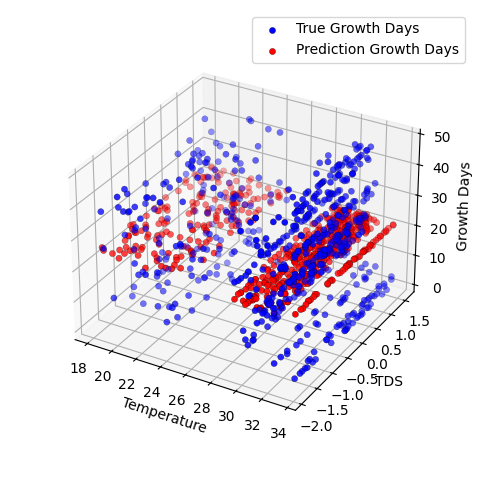

In [102]:
import numpy as np

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect(None, zoom=0.85)

ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y, color='blue', edgecolors='black', linewidths=0.2, label='True Growth Days')
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_pred, color='red', edgecolors='black', linewidths=0.2, label='Prediction Growth Days')

ax.legend()
ax.set_xlabel('Temperature')
ax.set_ylabel('TDS')
ax.set_zlabel('Growth Days')